In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

students = pd.read_csv('stud_math.csv')

In [2]:
display(students.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [3]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Числовых столбцов  - 13

Строковых столбцов - 17

Датасет содержит данные о 395 учениках, в датасете 30 столбцов.

Cмотрим корреляццию между столбцами:

In [4]:
students.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


##### Удаляем столбец 'studytime, granular', который полностью коррелируется с studytime:

In [5]:
students.drop(columns='studytime, granular', inplace=True)

##### Смотрим, в каких столбцах есть пустые ячейки, и сколько таковых.

In [6]:
NaN_students = pd.DataFrame(students.isna().sum(), columns=['NaN'])
NaN_students

,NaN
school,0
sex,0
age,0
address,17
famsize,27
Pstatus,45
Medu,3
Fedu,24
Mjob,19
Fjob,36


## Первичный анализ данных по столбцам. Построение гистрограмм, поиск выбросов

In [7]:
def first_look(col, borders=None):
    print('Столбец', col)
    fig, ax = plt.subplots()
    #Проверка на строковый тип данных
    if students.loc[:, col].dtypes == 'object':
        sns.countplot(students.loc[:, col])
        plt.show()
    else:
        students.loc[:, col].hist()
        ax.set_xlabel(col)
        ax.set_ylabel('count')
        plt.show()
        if borders is not None:  # Проверка на наличие выбросов по данному столбцу
            if students.loc[(~students.loc[:, col].between(borders[0], borders[1])) &
                        pd.notnull(students.loc[:, col])].shape[0] > 0:
                print('Найдены выбросы:')
                display(students.loc[(~students.loc[:, col].between(borders[0], borders[1])) &
                                 pd.notnull(students.loc[:, col])])

    print()

#### Смотрим каждый столбец в отдельности.

Столбец school


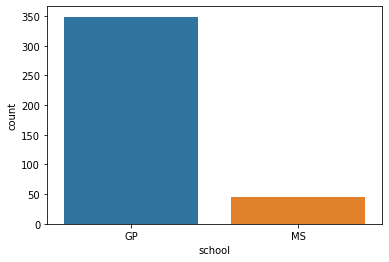


Столбец sex


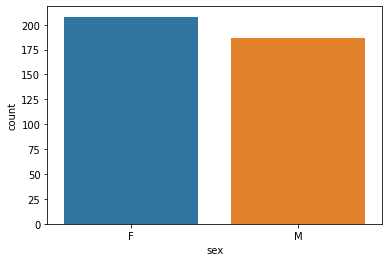


Столбец age


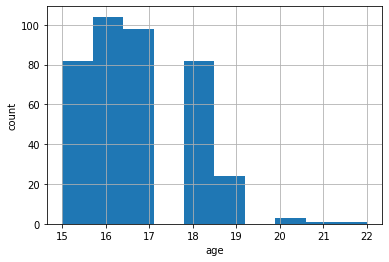


Столбец address


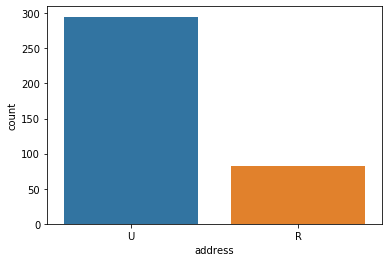


Столбец famsize


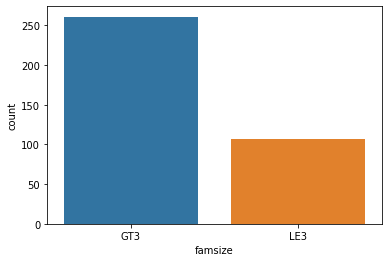


Столбец Pstatus


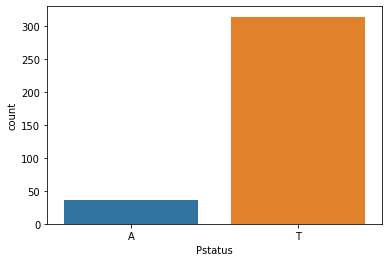


Столбец Medu


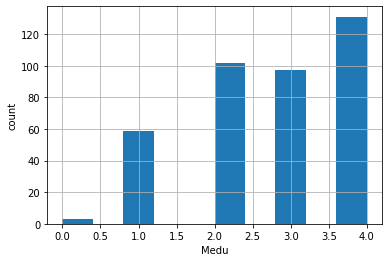


Столбец Fedu


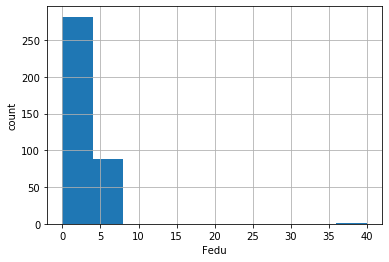

Найдены выбросы:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,NaN,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0



Столбец Mjob


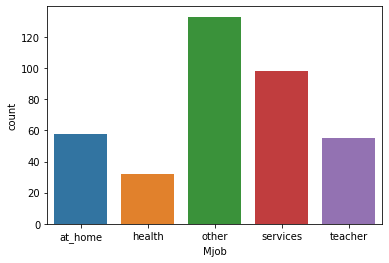


Столбец Fjob


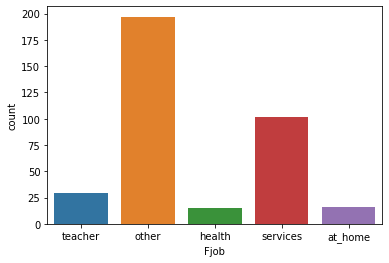


Столбец reason


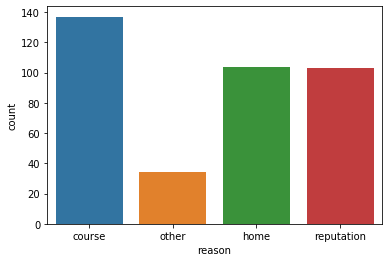


Столбец guardian


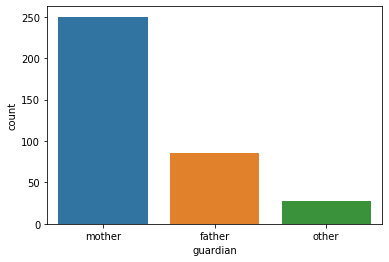


Столбец traveltime


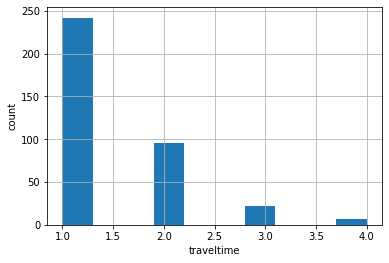


Столбец studytime


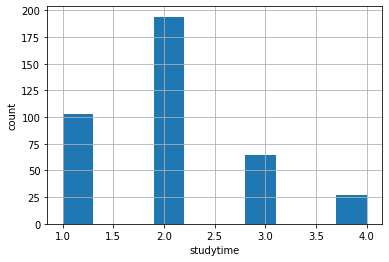


Столбец failures


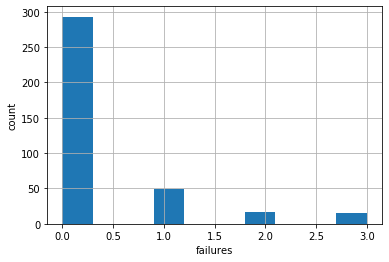


Столбец schoolsup


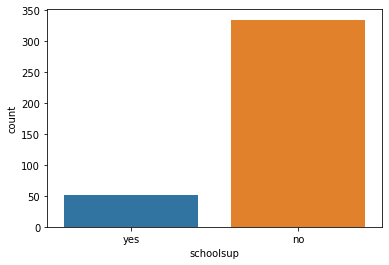


Столбец famsup


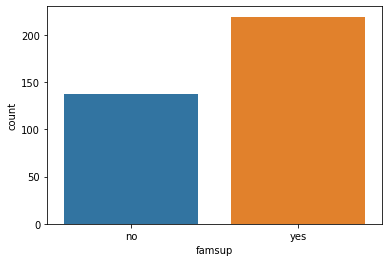


Столбец paid


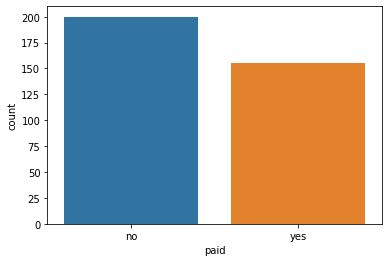


Столбец activities


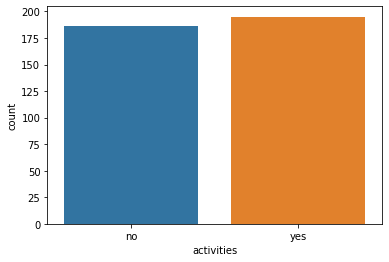


Столбец nursery


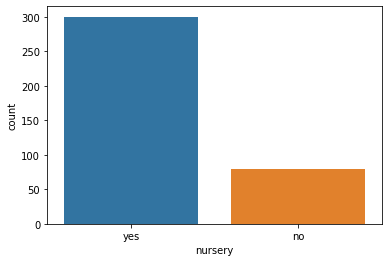


Столбец higher


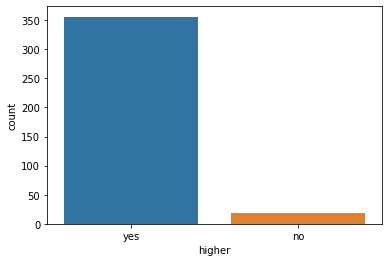


Столбец internet


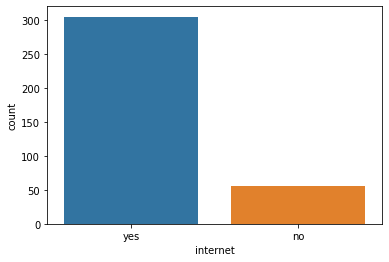


Столбец romantic


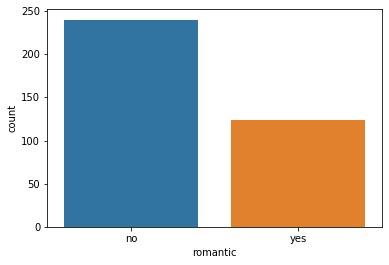


Столбец famrel


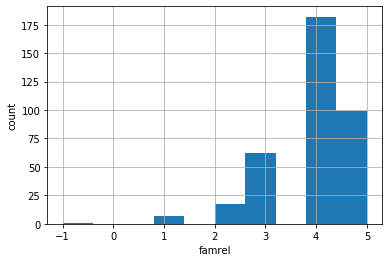

Найдены выбросы:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16,U,GT3,NaN,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0



Столбец freetime


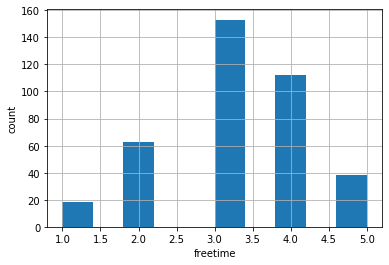


Столбец goout


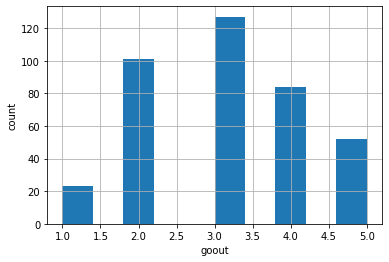


Столбец health


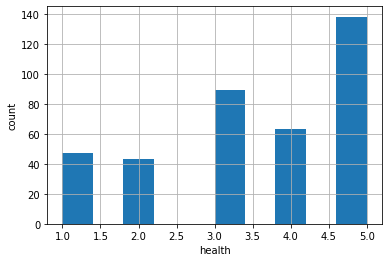


Столбец absences


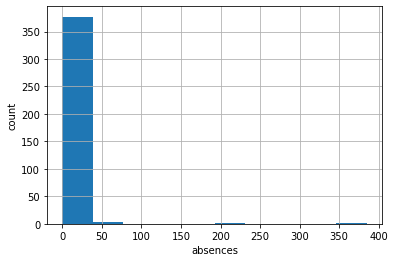

Найдены выбросы:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0



Столбец score


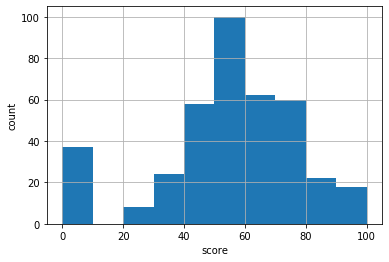

In [8]:
first_look('school')
first_look('sex')
first_look('age', borders=(15, 22))
first_look('address')
first_look('famsize')
first_look('Pstatus')
first_look('Medu', borders=(0,4))
first_look('Fedu', borders=(0,4))
first_look('Mjob')
first_look('Fjob')
first_look('reason')
first_look('guardian')
first_look('traveltime', borders=(1,4))
first_look('studytime', borders=(1,4))
first_look('failures', borders=(0,3))
first_look('schoolsup')
first_look('famsup')
first_look('paid')
first_look('activities')
first_look('nursery')
first_look('higher')
first_look('internet')
first_look('romantic')
first_look('famrel', borders=(1,5))
first_look('freetime', borders=(1,5))
first_look('goout', borders=(1,5))
first_look('health', borders=(1,5))
first_look('absences', borders=(0,200))
first_look('score', borders=(0, 100))

#### Устраняем выбросы

##### Заменяем в 11 строке параметр Fedu c 40 на 4

In [9]:
students.loc[11, 'Fedu'] = 4

##### Заменяем в 25 строке параметр famrel c -1 на 1

In [10]:
students.loc[25, 'famrel'] = 1

In [12]:
students.loc[11]

school                GP
sex                    F
age                   15
address                U
famsize              GT3
Pstatus              NaN
Medu                   2
Fedu                   4
Mjob            services
Fjob               other
reason        reputation
guardian          father
traveltime             3
studytime              3
failures               0
schoolsup             no
famsup               yes
paid                  no
activities           yes
nursery              yes
higher               yes
internet             yes
romantic              no
famrel                 5
freetime               2
goout                  2
health                 4
absences               4
score                 60
Name: 11, dtype: object

##### В двух строках выбросы по количеству пропущенных занятий - 385 и 212, хотя оценки 85 и 45 соответственно. Скорее всего, это ошибки. Меняем в обеих строках количество пропущенных занятий на медианное значение:

In [21]:
students.loc[222, 'absences'] = students.absences.median()
students.loc[390, 'absences'] = students.absences.median()

##### Проверяем изменённые строки: 11, 25, 222, 390:

In [22]:
students.loc[[11, 25, 222, 390], :]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,NaN,2.0,4.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0
25,GP,F,16,U,GT3,NaN,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,yes,yes,no,1.0,2.0,2.0,5.0,14.0,40.0
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,yes,yes,no,2.0,3.0,1.0,3.0,4.0,85.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,4.0,45.0


## Корреляционный анализ

##### Нас интересует корреляция столбца score с данными из других столбцов:

In [27]:
students.corr().score

age          -0.155726
Medu          0.213349
Fedu          0.130923
traveltime   -0.070559
studytime     0.115741
failures     -0.344338
famrel        0.055305
freetime      0.019026
goout        -0.129685
health       -0.070460
absences      0.030943
score         1.000000
Name: score, dtype: float64

## Анализ номинативных переменных

In [61]:
def get_boxplot(col):
    # Проверка на строковый тип данных
    if students.loc[:, col].dtypes == 'object':
        fig, ax = plt.subplots(figsize=(8, 4))
        sns.boxplot(x=col, y='score',
                    data=students,
                    ax=ax)
        plt.xticks(rotation=45)
        ax.set_title('Распределение баллов для ' + col)
        plt.show()
    print()

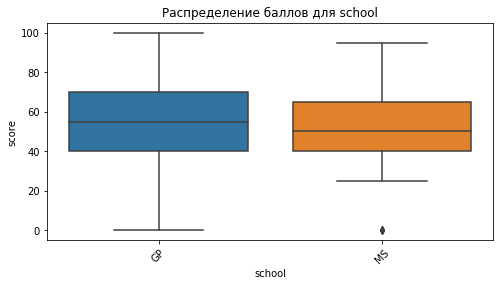

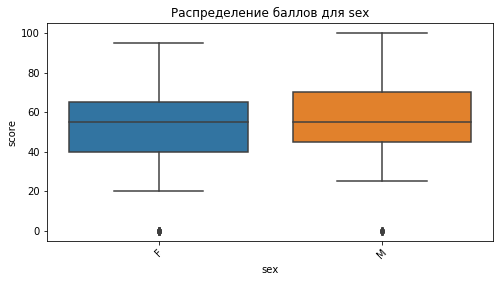

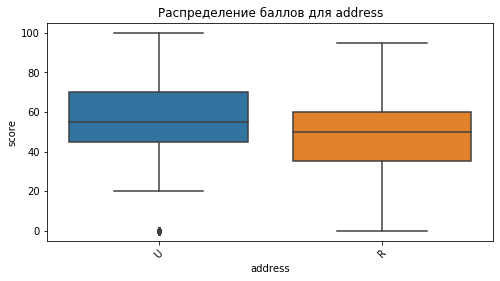

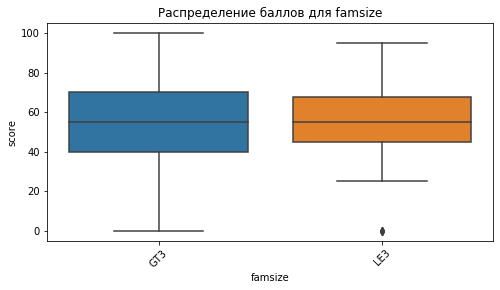

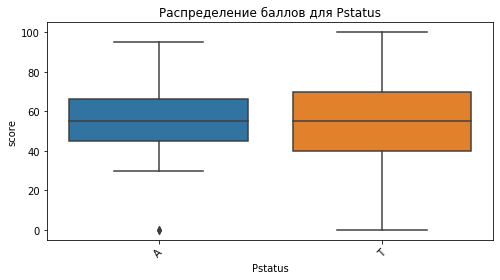

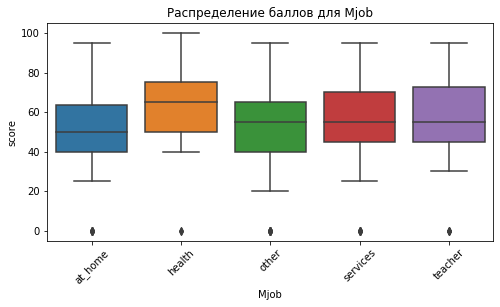

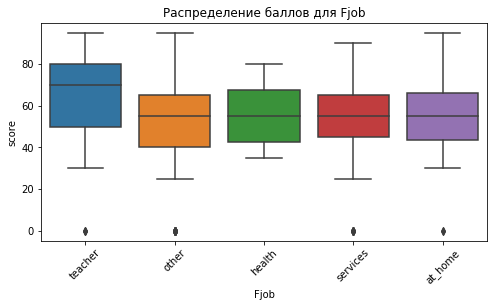

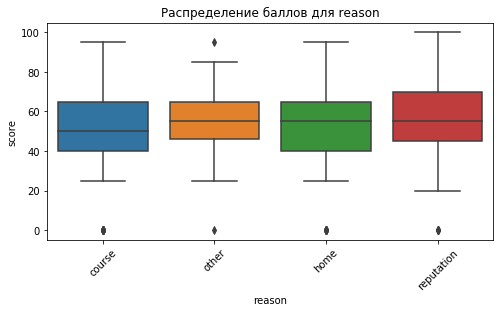

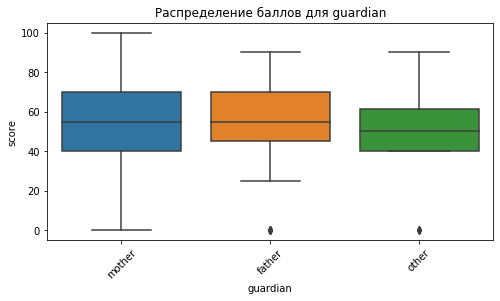

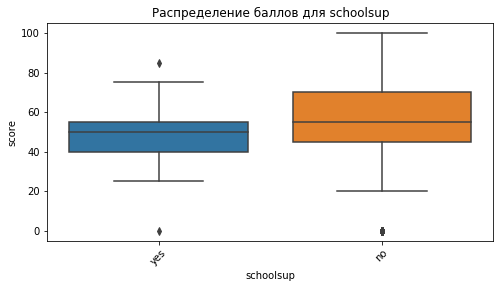

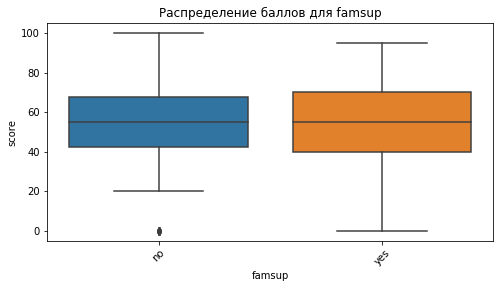

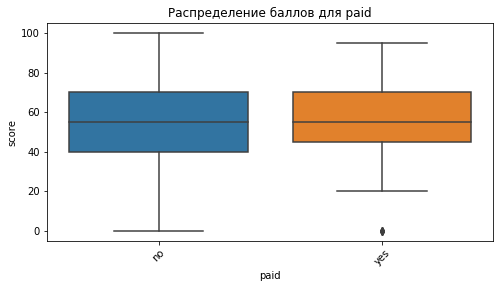

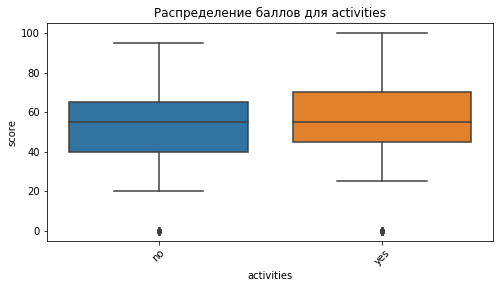

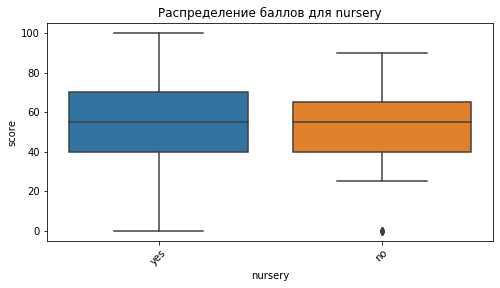

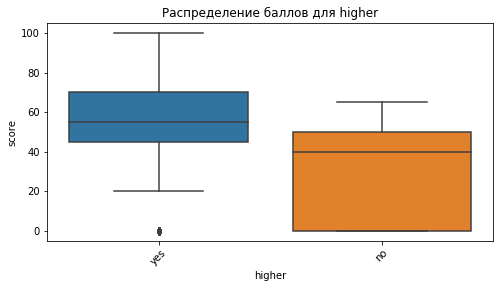

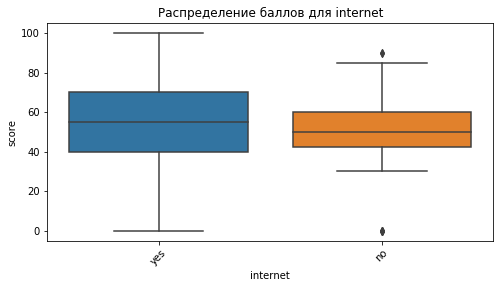

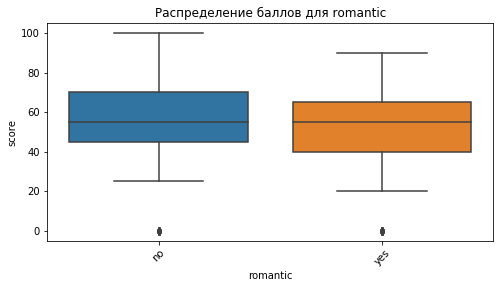

In [62]:
for col in students.columns:
    get_boxplot(col)

#### Смотрим, по каким номинативным столбцам имеются статистически значимые различия:

In [88]:
def get_stat_dif(col):
    # Проверка на строковый тип данных
    if students.loc[:, col].dtypes == 'object':
        combinations_all = list(combinations(students.loc[:, col].dropna().unique(), 2))
        for comb in combinations_all:
            if ttest_ind(students.loc[students.loc[:, col] == comb[0], 'score'].dropna(),
                             students.loc[students.loc[:, col] == comb[1], 'score'].dropna()).pvalue \
                    <= 0.05/len(combinations_all):  # Учли поправку Бонферони
                print('Найдены статистически значимые различия для колонки', col)
                break
        print()

In [89]:
for col in students.columns:
    get_stat_dif(col)



Найдены статистически значимые различия для колонки address



Найдены статистически значимые различия для колонки Mjob









Найдены статистически значимые различия для колонки higher


Найдены статистически значимые различия для колонки romantic



## Выводы

- В данных достаточно мало пустых значений.
- Выбросов за пределы "здравого смысла" практически нет (те, что найдены, исправлены). Данные достаточно чистые.
- Со столбцом score больше всего коррелируют столбцы age, Medu, Fedu, studytime, failures, goout. Коэффициент корреляции у них более 0,1. 
- Образование мамы значительно сильнее влияет на оценки ученика, чем образование папы.
- Наибольшее (отрицательное) влияние на оценки оказывает фактор из столбца failures.
- Cтатистически значимые различия у номинативных данных выявлены в столбцах address, Mjob, higher, romantic.